# PhenoGraph
PhenoGraph official tutorial: https://github.com/dpeerlab/PhenoGraph/blob/master/examples/tutorial_pbmc3k.ipynb

In [10]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle as pkl

import sys
sys.path.append('../cytof')
from utils import save_multi_channel_img, load_CytofCohort
from classes import CytofCohort

In [11]:
class options:
    def __init__(self):
        self.cohort_file   = "/archive/DPDS/Xiao_lab/shared/hudanyun_sheng/github/image_cytof_test_data/hyperion/cohort1/test_cohort.csv" 
        self.outdir        = "../test_out/cohort/test_cohort/test_cohort"
        self.normq         = 99
        self.feat_set      = "all" #choose from: "all", "cell_sum", "cell_ave", "cell_sum_only", "cell_ave_only"
        self.feat_type     = "normed_scaled" # choose from "normed_scaled", "normed", ""
        self.pheno_markers = "all" # or a list of markers, e.g. ['AE1-AE3', 'GranzymeB', 'IFNg', 'HLA-DR', 'PD-L1', 'CD8', 'CD16',  'PD-1', 'CD38', 'Cisplatin', 'CD163','CD68','CD11c','FoxP3','CD4', 'Vimentin','CD123', 'CD19', 'Ki-67']
        self.cohort_out    = "cytof_cohort.pkl"
        self.k             = None
params = options()

In [12]:
# create or load
if os.path.exists(os.path.join(params.outdir, params.cohort_out)):
    cytof_cohort = load_CytofCohort(os.path.join(params.outdir, "cytof_cohort.pkl"))
    print("Keys for PhenoGraph: {}".format(", ".join(cytof_cohort.phenograph.keys())))
else:
    cytof_cohort = CytofCohort(file_cohort=params.cohort_file, 
                           file_io=os.path.join(params.outdir,'input_output.csv'), 
                           dir_out=params.outdir)

### PhenoGraph Clustering

In [6]:
# run phenograph
key_pheno = cytof_cohort.clustering_phenograph(normq=params.normq, feat_type=params.feat_type, 
                                               feat_set=params.feat_set, pheno_markers=params.pheno_markers,
                                               k=None, save_vis=True)


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.339202642440796 seconds
Jaccard graph constructed in 24.925670623779297 seconds
Wrote graph to binary file in 2.69270920753479 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.732791
After 2 runs, maximum modularity is Q = 0.734585
Louvain completed 22 runs in 55.3775897026062 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 89.86420822143555 seconds

11 communities found. The dictionary key for phenograph: 99normed_scaled_all_208_all.


In [13]:
# attach phenograph clustering output to each individual CytofImage in the cohort
if key_pheno not in cytof_cohort.phenograph.keys():
    cytof_cohort.attach_individual_roi(key_pheno=key_pheno)
if not os.path.exists(os.path.join(params.outdir, params.cohort_out)):
    cytof_cohort.save_cytof_cohort(os.path.join(params.outdir, params.cohort_out))

### Visualize PhenoGraph for the cohort 
Option to change the level to visualize: "cohort", "slide", "roi"

In [4]:
key_pheno = "99normed_scaled_all_208_all"

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP39264_B3.png


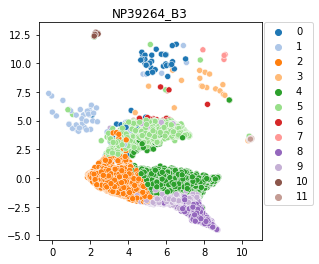

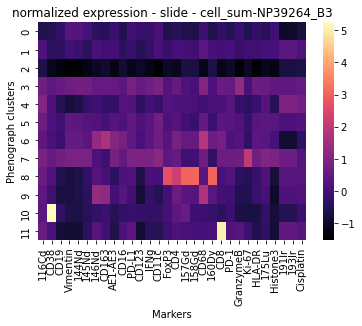

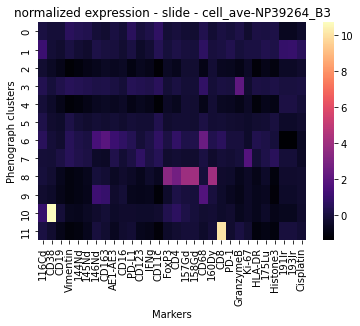

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP37646_B5.png


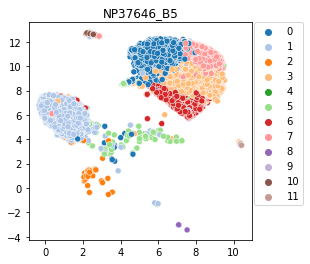

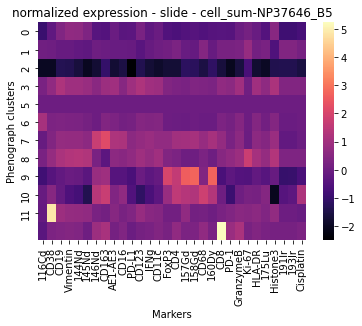

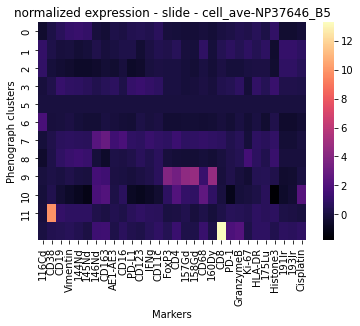

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP39264_B3.png


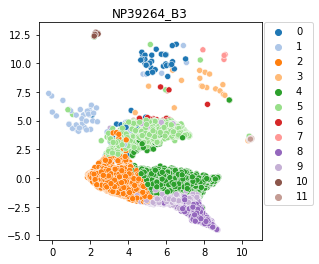

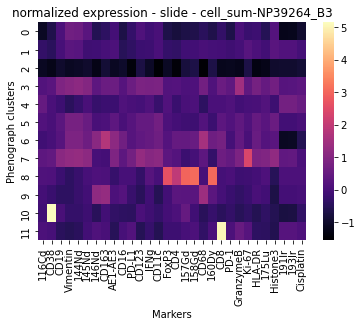

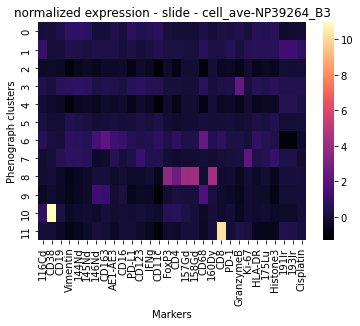

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP37646_B5.png


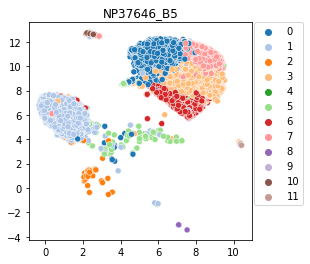

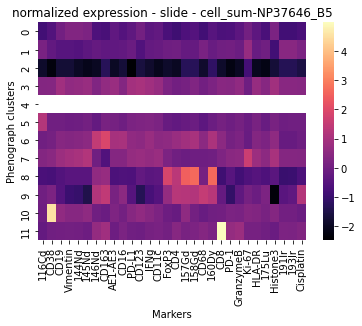

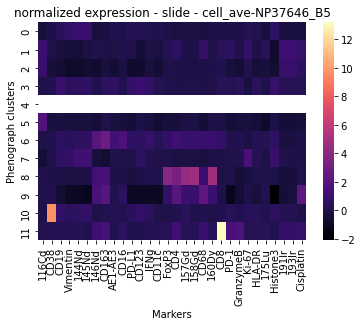

In [16]:
# import re
# from typing import Union, Optional, Type, Tuple, List
# from utils import visualize_scatter, visualize_expression
# def vis_phenograph(self, 
#                    key_pheno: str,
#                    level: Union["cohort", "slide", "roi"] = "cohort",
#                    accumul_type: List[str] = None, # Union["cell_sum", "cell_ave"]
#                    normalize: bool = False, 
#                    save_vis: bool = False
#                   ): 
#     this_pheno  = self.phenograph[key_pheno]
#     feat_names  = this_pheno['features']
#     descrip     = this_pheno['description']
#     n_community = this_pheno['N']
#     markers     = this_pheno['markers']
#     feat_set    = self.feat_sets[descrip['feature_set']]


#     if save_vis:
#         vis_savedir = os.path.join(self.dir_out, "phenograph", key_pheno+"-{}".format(n_community))
#         if not os.path.exists(vis_savedir):
#             os.makedirs(vis_savedir)
#     else:
#         vis_savedir = None

#     if accumul_type is None: # by default, visualize all accumulation types
#         accumul_type = [_ for _ in feat_set if "morphology" not in _]
#     if isinstance(accumul_type, str):
#         accumul_type = [accumul_type]


#     proj_2d     = self.phenograph[key_pheno]['proj_2d']
#     df_feature  = self.phenograph[key_pheno]['data']
#     communities = self.phenograph[key_pheno]['communities']

#     if level == "cohort":
#         proj_2ds = {"cohort": proj_2d}
#         df_feats = {"cohort": df_feature}
#         commus   = {"cohort": communities}
#     else:
#         df_feats, proj_2ds, commus = self._gather_roi_pheno(key_pheno)
#         if level == "slide":
#             for slide in self.df_cohort["Slide"].unique(): # for each slide
                
#                 f_rois = [roi_i.replace(".txt", "") for roi_i in self.df_cohort.loc[self.df_cohort["Slide"] == slide, "ROI"]]
#                 df_feats[slide] = pd.concat([df_feats[f_roi] for f_roi in f_rois])
#                 proj_2ds[slide] = np.concatenate([proj_2ds[f_roi] for f_roi in f_rois])
#                 commus[slide]   = np.concatenate([commus[f_roi] for f_roi in f_rois])
#                 for f_roi in f_rois:
#                     df_feats.pop(f_roi)
#                     proj_2ds.pop(f_roi)
#                     commus.pop(f_roi)

#     cluster_protein_exps = {}
#     for key, df_feature in df_feats.items():  
#         proj_2d = proj_2ds[key]
#         commu = commus[key]
#         # Visualize 1: plot 2d projection together
#         print("Visualization in 2d - {}-{}".format(level, key))
#         savename = os.path.join(vis_savedir, f"cluster_scatter_{level}_{key}.png") if save_vis else None
#         visualize_scatter(data=proj_2d, communities=commu, n_community=n_community,
#                            title=key, figsize=(4,4), savename=savename)

#         # Visualize 2: protein expression
#         for acm_tpe in accumul_type:
#             ids         = [i for (i,x) in enumerate(feat_names) if re.search(".{}".format(acm_tpe), x)]
#             feat_names_ = [feat_names[i] for i in ids]  
            

#             cluster_protein_exp = np.zeros((n_community, len(markers)))

#             group_ids   = np.arange(len(np.unique(communities)))
#             for cluster in range(len(np.unique(communities))): # for each (global) community
#                 df_sub = df_feature.loc[commu==cluster]
#                 if df_sub.shape[0] == 0:
#                     group_ids = np.delete(group_ids, group_ids==cluster)
#                     continue
#                 for i, feat in enumerate(feat_names_):
#                     cluster_protein_exp[cluster, i] = np.average(df_sub[feat])
            
#             # get rid of non-exist clusters
#             '''cluster_protein_exp = cluster_protein_exp[group_ids, :]'''
#             if normalize:
#                 cluster_protein_exp_norm = cluster_protein_exp - np.median(cluster_protein_exp, axis=0)
#                 # or set non-exist cluster to be inf
#                 rid = set(np.arange(len(np.unique(communities))))-set(group_ids)
#                 if len(rid) > 0:
#                     rid = np.array(list(rid))
#                     cluster_protein_exp_norm[rid, :] = np.nan
#                     group_ids   = np.arange(len(np.unique(communities)))
#             savename = os.path.join(vis_savedir, "protein_expression_{}_{}_{}.png".format(level, acm_tpe, key)) \
#             if save_vis else None
#             vis_exp = cluster_protein_exp_norm if normalize else cluster_protein_exp
#             visualize_expression(data=vis_exp, markers=markers,
#                                   group_ids=group_ids, 
#                                   title="{} - {}-{}".format(level, acm_tpe, key), savename=savename)
#             cluster_protein_exps[key] = vis_exp
            
#     return df_feats, commus, cluster_protein_exps

df_feats, commus, cluster_protein_exps = cytof_cohort.vis_phenograph(key_pheno, level="slide", 
                                                                     accumul_type=None, save_vis=True)

df_feats_, commus_, cluster_protein_exps_ = cytof_cohort.vis_phenograph(key_pheno, level="slide", 
                                                           accumul_type=None, save_vis=True,
                                                           normalize=True
                                                          )

# df_feats, commus, cluster_protein_exps = cytof_cohort.vis_phenograph(key_pheno, #level="slide", 
#                                                                      accumul_type=None, save_vis=True)

### PhenoGraph cluster interaction analysis

k: 8


../cytof/classes.py:1175: RuntimeWarning: invalid value encountered in divide
  interact_norm = np.log10(edge_percentage / expected_percentage + 0.1)


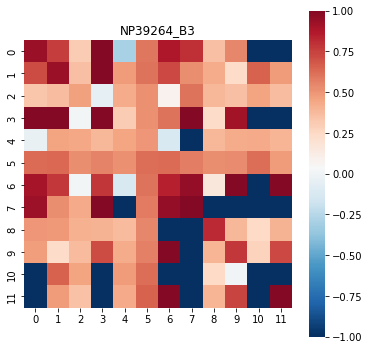

<Figure size 432x288 with 0 Axes>

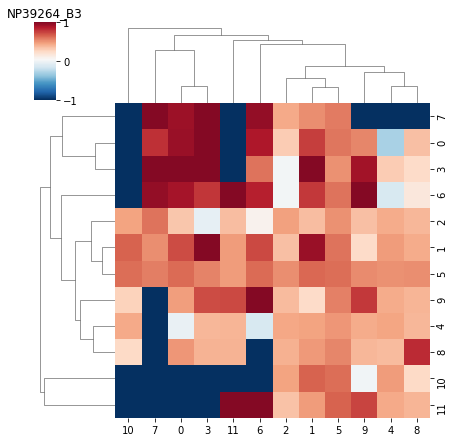

<Figure size 432x288 with 0 Axes>

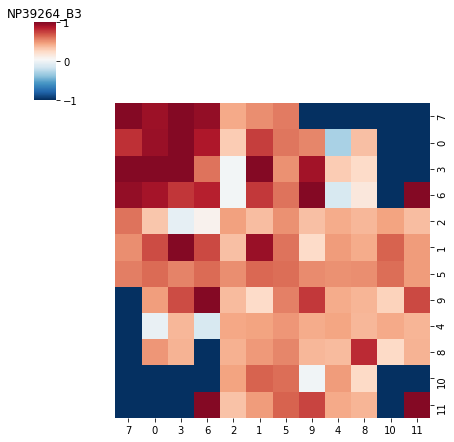

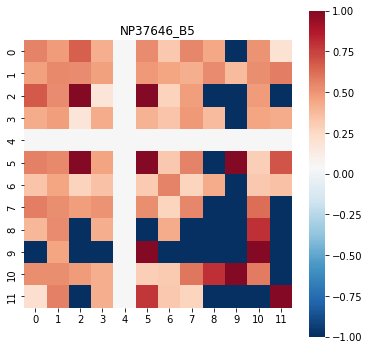

<Figure size 432x288 with 0 Axes>

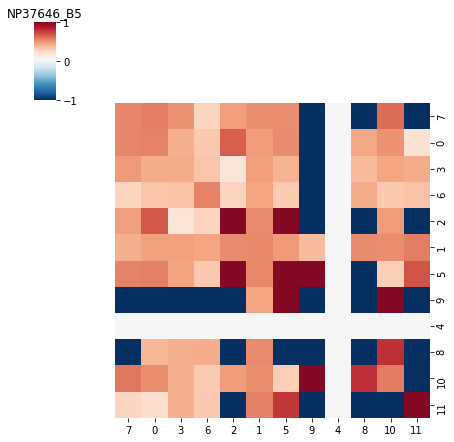

In [17]:
interacts, clustergrid = cytof_cohort.cluster_interaction_analysis(key_pheno, 
                                                                   method="kneighbor",
#                                                                    method="distance", 
                                                                   level="slide", 
                                                                   clustergrid=None)#, thres=50)
                                                    # clustergrid=None, **{"thres": 50})

### Visualize PhenoGraph clustering with original (ROI) image

In [18]:
# load a cytofImage object
from utils import load_CytofImage
outdir = "../test_out/cohort/test_cohort/test_cohort/cytof_images"
f_name = "NP37646_B5_TM14MAR20_NP37646_B5_ROI_001B_9.pkl"

cytof_img = load_CytofImage(os.path.join(outdir, f_name))
print(cytof_img.filename)

/archive/DPDS/Xiao_lab/shared/hudanyun_sheng/github/image_cytof_test_data/hyperion/cohort1/NP37646_B5/TM14MAR20_NP37646_B5_ROI_001B_9.txt


Visualizing channels: nuclei, CD8(Dy162Di)
Visualizing... 
nuclei in red
CD8(Dy162Di) in green



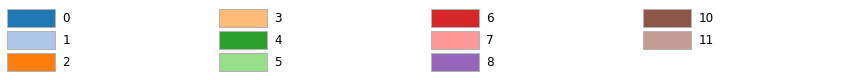

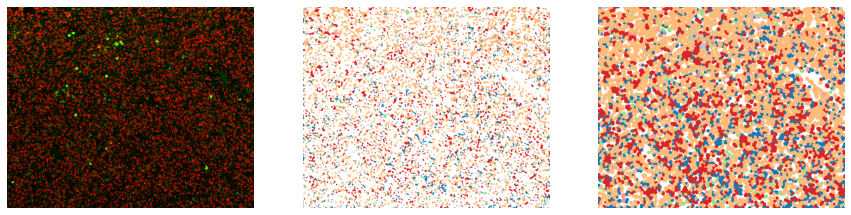

In [21]:
# multi-channal visualization of the original image
from utils import show_color_table
vis_multi, quantiles, color_pool \
= cytof_img.visualize_channels(channel_names=["nuclei", "CD8(Dy162Di)"],#, "CD38(Pr141Di)"], 
                               visualize=False)

# PhenoGraph clustering visualization
stain_nuclei, stain_cell, color_dict = cytof_img.visualize_pheno(key_pheno='99normed_scaled_all_208_all')
show_color_table(color_dict)
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(vis_multi)
axs[1].imshow(stain_nuclei)
axs[2].imshow(stain_cell)
for i in range(3):
    axs[i].axis('off')

#### Customized `color_dict`

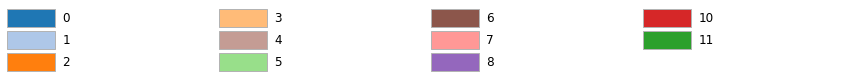

In [221]:
import copy
my_color_dict = copy.deepcopy(color_dict)
# my_color_dict = dict((_, (180/255, 180/255, 180/255)) \
#                      for _ in range(list(cytof_img.phenograph.values())[0]['N']))

my_color_dict[11] = color_dict[4]
my_color_dict[4]  = color_dict[11]
my_color_dict[6] = color_dict[10] 
my_color_dict[10]  = color_dict[6] 
show_color_table(my_color_dict)

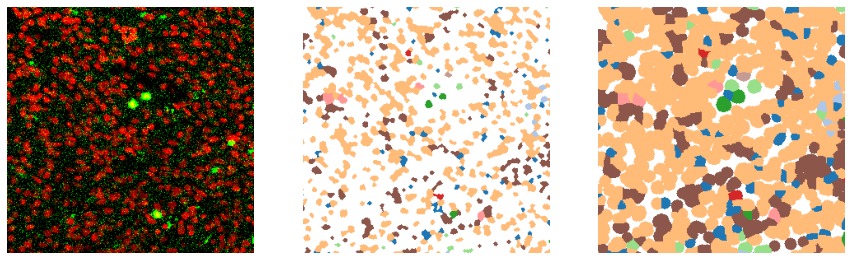

In [226]:
stain_nuclei, stain_cell, _ = visualize_pheno(cytof_img, 
                                              color_dict=my_color_dict, 
                                              key_pheno='99normed_scaled_all_208_all')


fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(vis_multi[0:300, 100:400, :])
axs[1].imshow(stain_nuclei[0:300, 100:400, :])
axs[2].imshow(stain_cell[0:300, 100:400, :])
for i in range(3):
    axs[i].axis('off')

#### Run a bunch of experiments with different sets of parameters

In [26]:
normqs            = [75, 99] 
feat_sets         = ["all", "cell_sum", "cell_ave", "cell_sum_only", "cell_ave_only"]
all_pheno_markers = ["all", ['AE1-AE3', 'GranzymeB', 'IFNg', 'HLA-DR', 'PD-L1', 'CD8', 'CD16',  'PD-1', 'CD38', 'Cisplatin', 
                      'CD163','CD68','CD11c','FoxP3','CD4', 'Vimentin','CD123', 'CD19', 'Ki-67']]


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.2214722633361816 seconds
Jaccard graph constructed in 30.624993562698364 seconds
Wrote graph to binary file in 2.394883871078491 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.712532
After 2 runs, maximum modularity is Q = 0.713892
After 12 runs, maximum modularity is Q = 0.715486
Louvain completed 32 runs in 67.09974646568298 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 111.5755226612091 seconds

11 communities found. The dictionary key for phenograph: 75normed_scaled_all_208_all.
75normed_scaled_all_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_all-11/cluster_scatter_cohort_cohort.png


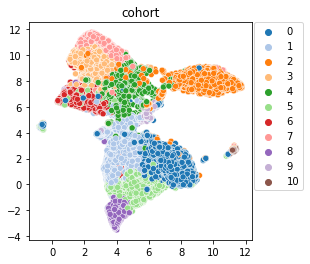

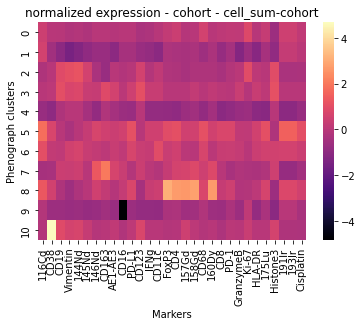

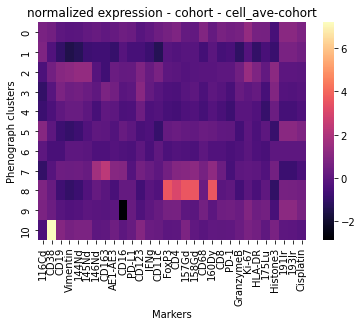


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.139266014099121 seconds
Jaccard graph constructed in 29.288429498672485 seconds
Wrote graph to binary file in 2.3041911125183105 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.680544
After 10 runs, maximum modularity is Q = 0.682182
After 20 runs, maximum modularity is Q = 0.683297
Louvain completed 40 runs in 101.92073941230774 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 144.60381960868835 seconds

11 communities found. The dictionary key for phenograph: 75normed_scaled_all_208_subset1.
75normed_scaled_all_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_subset1-11/cluster_scatter_cohort_cohort.png


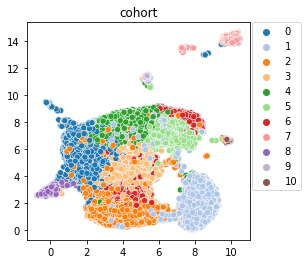

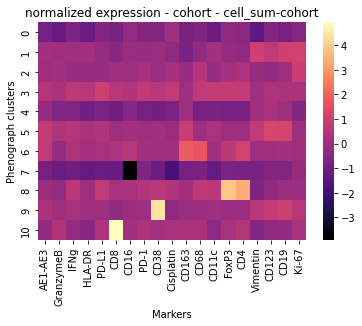

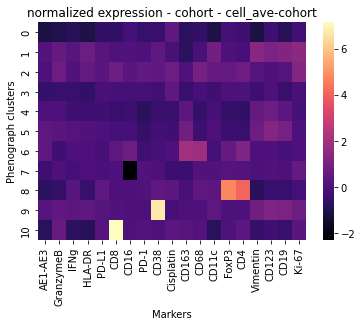


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0303454399108887 seconds
Jaccard graph constructed in 28.881918907165527 seconds
Wrote graph to binary file in 2.2987425327301025 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.685325
Louvain completed 21 runs in 52.925766706466675 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 95.29156732559204 seconds

11 communities found. The dictionary key for phenograph: 75normed_scaled_cell_sum_208_all.
75normed_scaled_cell_sum_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_all-11/cluster_scatter_cohort_cohort.png


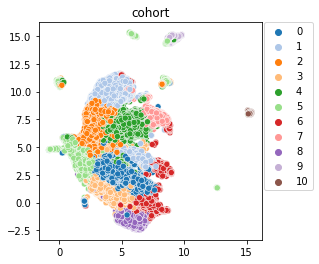

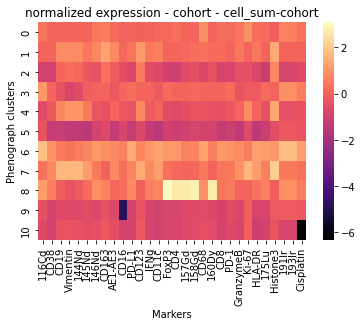


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0304489135742188 seconds
Jaccard graph constructed in 28.8928165435791 seconds
Wrote graph to binary file in 2.264164447784424 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.668126
Louvain completed 21 runs in 57.84450006484985 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 100.13851070404053 seconds

13 communities found. The dictionary key for phenograph: 75normed_scaled_cell_sum_208_subset1.
75normed_scaled_cell_sum_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_subset1-13/cluster_scatter_cohort_cohort.png


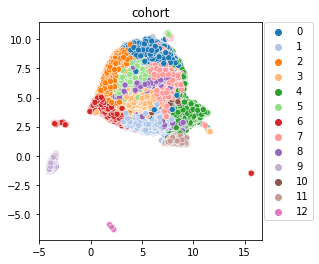

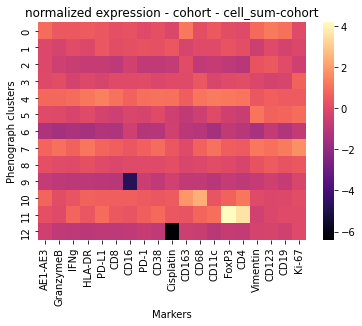


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0789718627929688 seconds
Jaccard graph constructed in 29.35876727104187 seconds
Wrote graph to binary file in 2.4266092777252197 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.703989
After 2 runs, maximum modularity is Q = 0.706572
After 4 runs, maximum modularity is Q = 0.70853
After 11 runs, maximum modularity is Q = 0.709977
Louvain completed 31 runs in 75.45095896720886 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 118.65011429786682 seconds

10 communities found. The dictionary key for phenograph: 75normed_scaled_cell_ave_208_all.
75normed_scaled_cell_ave_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_all-10/cluster_scatter_cohort_cohort.png


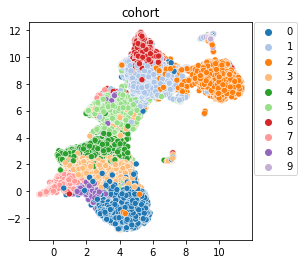

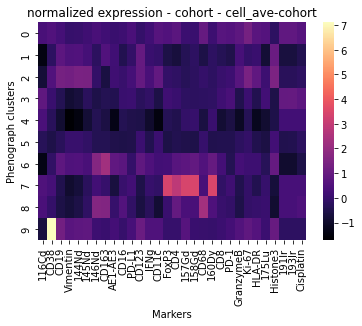


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0631189346313477 seconds
Jaccard graph constructed in 28.564733743667603 seconds
Wrote graph to binary file in 2.304414987564087 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.648479
After 3 runs, maximum modularity is Q = 0.650351
After 22 runs, maximum modularity is Q = 0.653408
Louvain completed 42 runs in 104.54824352264404 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 146.5493619441986 seconds

11 communities found. The dictionary key for phenograph: 75normed_scaled_cell_ave_208_subset1.
75normed_scaled_cell_ave_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_subset1-11/cluster_scatter_cohort_cohort.png


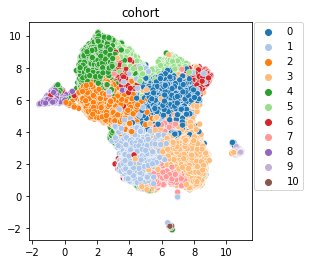

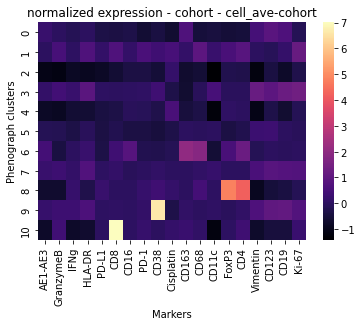


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0909359455108643 seconds
Jaccard graph constructed in 30.260977745056152 seconds
Wrote graph to binary file in 2.396463394165039 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.732216
After 3 runs, maximum modularity is Q = 0.733252
After 6 runs, maximum modularity is Q = 0.734995
Louvain completed 26 runs in 56.99633455276489 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 100.98864960670471 seconds

14 communities found. The dictionary key for phenograph: 75normed_scaled_cell_sum_only_208_all.
75normed_scaled_cell_sum_only_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_all-14/cluster_scatter_cohort_cohort.png


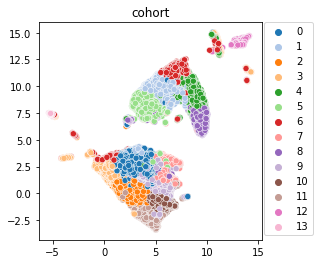

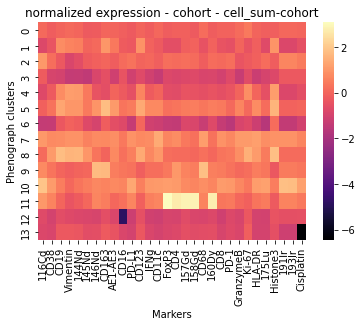


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0399529933929443 seconds
Jaccard graph constructed in 30.358550548553467 seconds
Wrote graph to binary file in 2.267951250076294 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.729994
Louvain completed 21 runs in 52.01161575317383 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 95.9926905632019 seconds

13 communities found. The dictionary key for phenograph: 75normed_scaled_cell_sum_only_208_subset1.
75normed_scaled_cell_sum_only_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_subset1-13/cluster_scatter_cohort_cohort.png


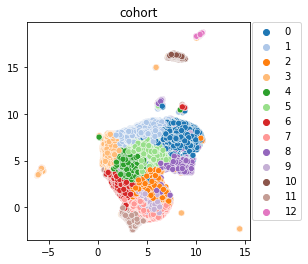

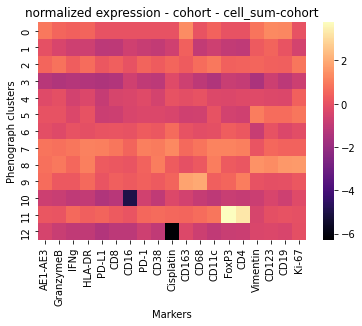


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.0378775596618652 seconds
Jaccard graph constructed in 30.152930736541748 seconds
Wrote graph to binary file in 2.5442118644714355 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.767467
After 2 runs, maximum modularity is Q = 0.768791
Louvain completed 22 runs in 48.65766477584839 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 92.76456880569458 seconds

10 communities found. The dictionary key for phenograph: 75normed_scaled_cell_ave_only_208_all.
75normed_scaled_cell_ave_only_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_all-10/cluster_scatter_cohort_cohort.png


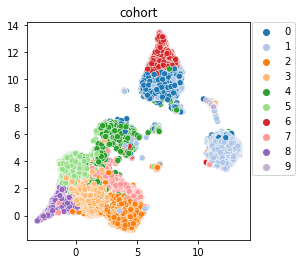

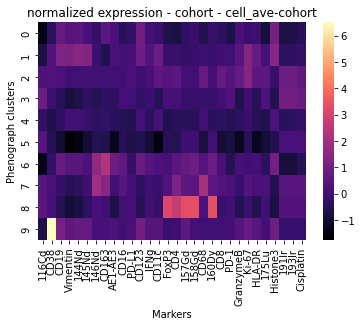


The attribute name of the feature: df_feature_75normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.034977674484253 seconds
Jaccard graph constructed in 30.270751953125 seconds
Wrote graph to binary file in 2.430454730987549 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.736631
Louvain completed 21 runs in 40.9709095954895 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 85.44536280632019 seconds

12 communities found. The dictionary key for phenograph: 75normed_scaled_cell_ave_only_208_subset1.
75normed_scaled_cell_ave_only_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_cohort_cohort.png


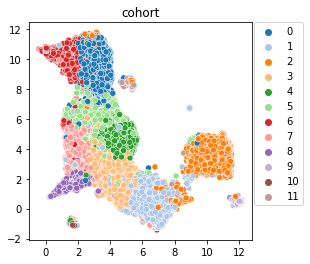

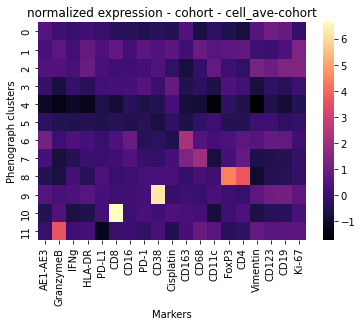


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.1820502281188965 seconds
Jaccard graph constructed in 30.685890674591064 seconds
Wrote graph to binary file in 2.343273639678955 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.732432
After 2 runs, maximum modularity is Q = 0.735083
Louvain completed 22 runs in 55.19567632675171 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 99.83061528205872 seconds

12 communities found. The dictionary key for phenograph: 99normed_scaled_all_208_all.
99normed_scaled_all_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_cohort_cohort.png


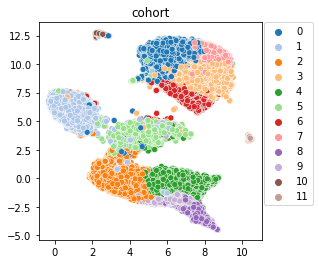

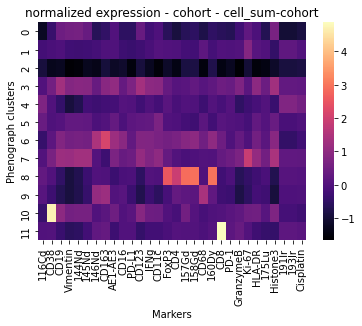

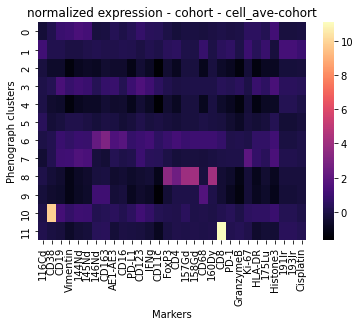


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.1358819007873535 seconds
Jaccard graph constructed in 28.91981601715088 seconds
Wrote graph to binary file in 2.368364095687866 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.698938
After 3 runs, maximum modularity is Q = 0.700334
Louvain completed 23 runs in 59.06129193305969 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 101.78029799461365 seconds

12 communities found. The dictionary key for phenograph: 99normed_scaled_all_208_subset1.
99normed_scaled_all_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_subset1-12/cluster_scatter_cohort_cohort.png


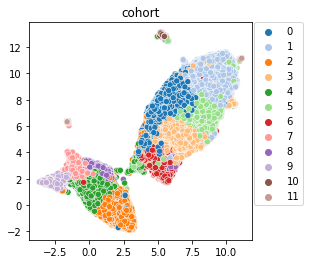

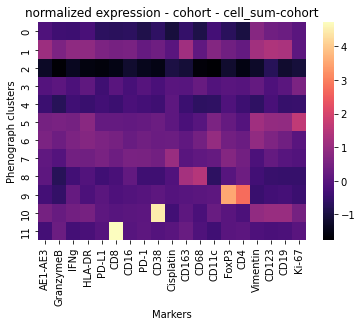

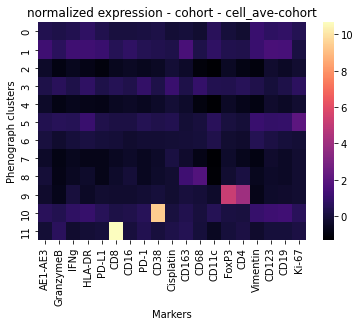


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.1138663291931152 seconds
Jaccard graph constructed in 29.446743965148926 seconds
Wrote graph to binary file in 2.307332992553711 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.699449
After 2 runs, maximum modularity is Q = 0.701463
After 4 runs, maximum modularity is Q = 0.70298
Louvain completed 24 runs in 58.85774755477905 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 102.02829432487488 seconds

10 communities found. The dictionary key for phenograph: 99normed_scaled_cell_sum_208_all.
99normed_scaled_cell_sum_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_all-10/cluster_scatter_cohort_cohort.png


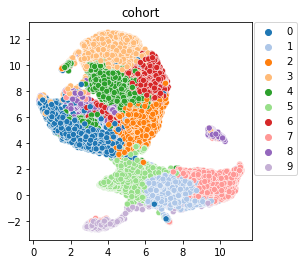

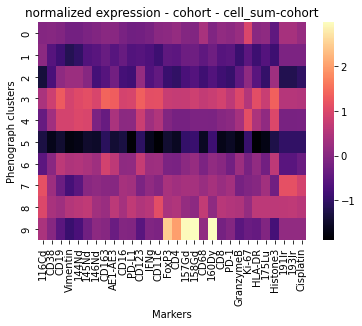


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.089157819747925 seconds
Jaccard graph constructed in 29.50417399406433 seconds
Wrote graph to binary file in 2.4150032997131348 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.671361
After 2 runs, maximum modularity is Q = 0.672509
Louvain completed 22 runs in 61.23051953315735 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 104.77209186553955 seconds

10 communities found. The dictionary key for phenograph: 99normed_scaled_cell_sum_208_subset1.
99normed_scaled_cell_sum_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_subset1-10/cluster_scatter_cohort_cohort.png


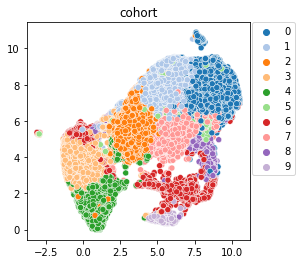

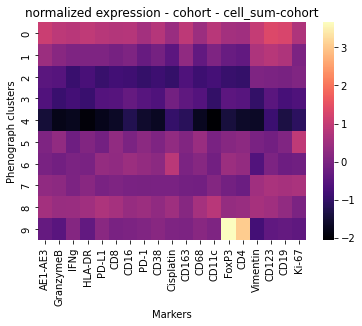


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.032573699951172 seconds
Jaccard graph constructed in 28.7841157913208 seconds
Wrote graph to binary file in 2.352205753326416 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.718578
After 5 runs, maximum modularity is Q = 0.72066
Louvain completed 25 runs in 60.26113033294678 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 102.84216713905334 seconds

11 communities found. The dictionary key for phenograph: 99normed_scaled_cell_ave_208_all.
99normed_scaled_cell_ave_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_all-11/cluster_scatter_cohort_cohort.png


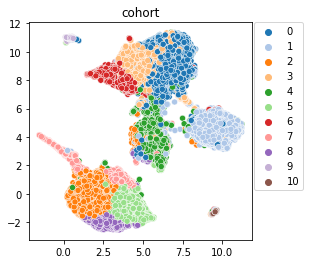

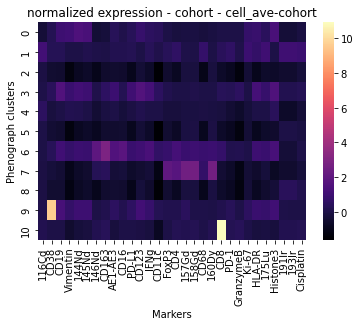


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.081998109817505 seconds
Jaccard graph constructed in 30.01353406906128 seconds
Wrote graph to binary file in 2.337999105453491 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.68697
Louvain completed 21 runs in 61.76408338546753 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 105.71043395996094 seconds

15 communities found. The dictionary key for phenograph: 99normed_scaled_cell_ave_208_subset1.
99normed_scaled_cell_ave_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_subset1-15/cluster_scatter_cohort_cohort.png


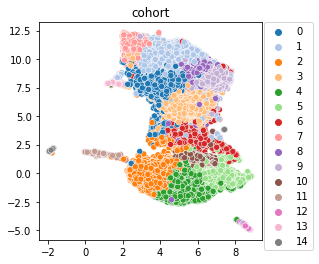

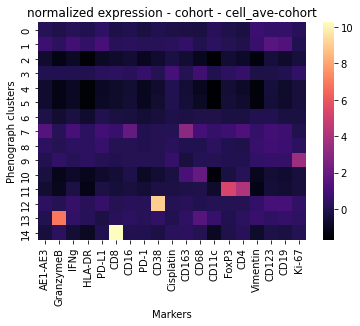


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.022815227508545 seconds
Jaccard graph constructed in 29.21499490737915 seconds
Wrote graph to binary file in 2.306245803833008 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.717263
After 2 runs, maximum modularity is Q = 0.720294
Louvain completed 22 runs in 51.71792149543762 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 94.68989849090576 seconds

11 communities found. The dictionary key for phenograph: 99normed_scaled_cell_sum_only_208_all.
99normed_scaled_cell_sum_only_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_all-11/cluster_scatter_cohort_cohort.png


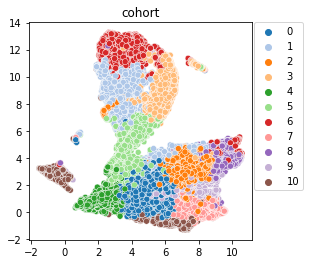

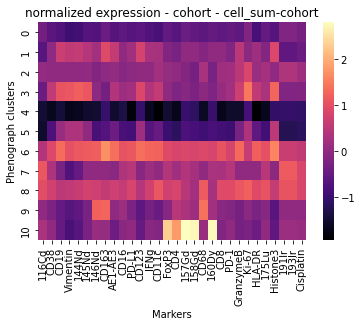


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.9587082862854004 seconds
Jaccard graph constructed in 28.403512716293335 seconds
Wrote graph to binary file in 2.2878458499908447 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.698895
After 2 runs, maximum modularity is Q = 0.702568
Louvain completed 22 runs in 61.1345055103302 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 103.38067507743835 seconds

11 communities found. The dictionary key for phenograph: 99normed_scaled_cell_sum_only_208_subset1.
99normed_scaled_cell_sum_only_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_subset1-11/cluster_scatter_cohort_cohort.png


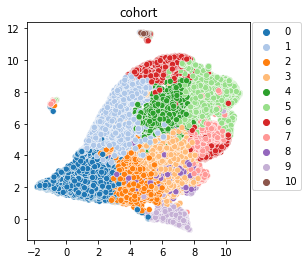

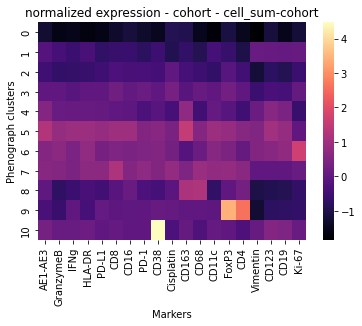


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.107147455215454 seconds
Jaccard graph constructed in 30.37201738357544 seconds
Wrote graph to binary file in 2.453737735748291 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.765439
Louvain completed 21 runs in 38.86569023132324 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 83.3899986743927 seconds

14 communities found. The dictionary key for phenograph: 99normed_scaled_cell_ave_only_208_all.
99normed_scaled_cell_ave_only_208_all
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_all-14/cluster_scatter_cohort_cohort.png


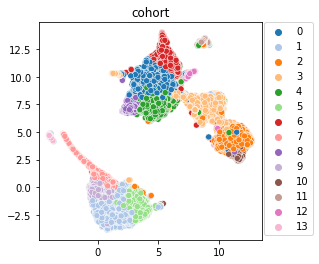

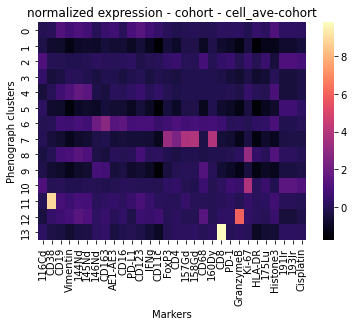


The attribute name of the feature: df_feature_99normed_scaled
Finding 208 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.9996161460876465 seconds
Jaccard graph constructed in 30.24391222000122 seconds
Wrote graph to binary file in 2.375474452972412 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.750918
Louvain completed 21 runs in 58.69599151611328 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 102.52523994445801 seconds

12 communities found. The dictionary key for phenograph: 99normed_scaled_cell_ave_only_208_subset1.
99normed_scaled_cell_ave_only_208_subset1
Visualization in 2d - cohort-cohort
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_cohort_cohort.png


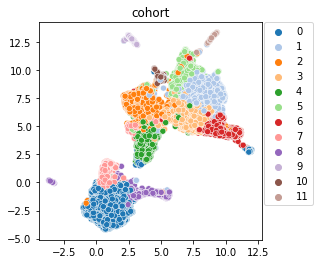

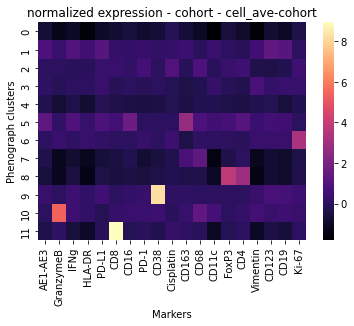

In [27]:
pheno_keys = []
for normq in normqs:
    for feat_set in feat_sets:
         for pheno_markers in all_pheno_markers:
                key_pheno = cytof_cohort.clustering_phenograph(normq=normq, feat_type="normed_scaled", 
                                                               feat_set=feat_set, pheno_markers=pheno_markers, 
                                                               k=None, save_vis=True)
                print(key_pheno)
                cytof_cohort.vis_phenograph(key_pheno, level="cohort", accumul_type=None, save_vis=True)
                pheno_keys.append(key_pheno)

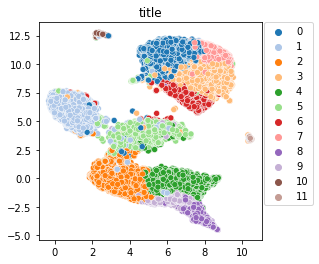

In [284]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.title('title')

sns.scatterplot(x=cytof_cohort.phenograph[key_pheno]['proj_2d'][:,0], 
                y=cytof_cohort.phenograph[key_pheno]['proj_2d'][:,1], 
                hue=cytof_cohort.phenograph[key_pheno]['communities'], 
                palette='tab20',
                hue_order=np.arange(cytof_cohort.phenograph[key_pheno]['N']),
                ax=ax
               )
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


saving plot to ./test


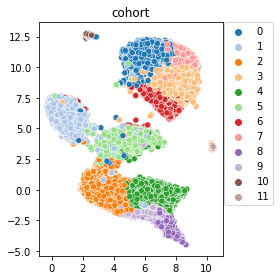

In [276]:
import seaborn as sns
def visualize_scatter(data, communities, n_community, title, figsize=(4,4), savename=None):
    """
    data = data to visualize (N, 2)
    communities = group indices correspond to each sample in data (N, 1) or (N, )
    n_community = total number of groups in the cohort (n_community >= unique number of communities)
    """
    fig, ax = plt.subplots(1,1, figsize=figsize)
    plt.title(title)
    sns.scatterplot(x=data[:,0], y=data[:,1], hue=communities, palette='tab20',
                    hue_order=np.arange(n_community))
                    #                 legend=legend,
                    # hue_order=np.arange(n_community))
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if savename is not None:
        print("saving plot to {}".format(savename))
        plt.savefig(savename)
    
    plt.show()

visualize_scatter(data=cytof_cohort.phenograph[key_pheno]['proj_2d'], 
                  communities=cytof_cohort.phenograph[key_pheno]['communities'], 
                  n_community=cytof_cohort.phenograph[key_pheno]['N'],
                  title='cohort', savename="./test")

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_all-11/cluster_scatter_slide_NP39264_B3.png


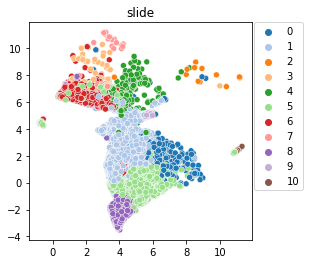

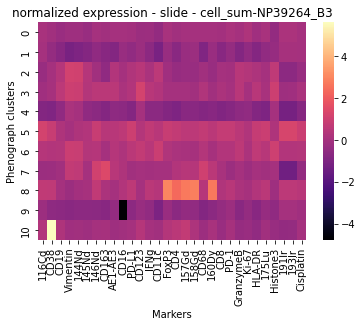

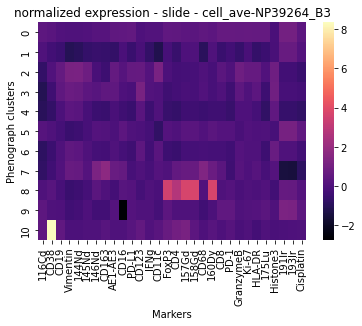

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_all-11/cluster_scatter_slide_NP37646_B5.png


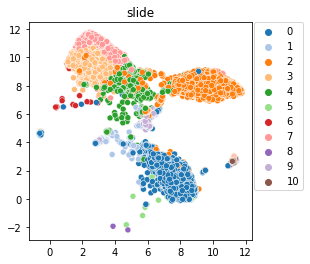

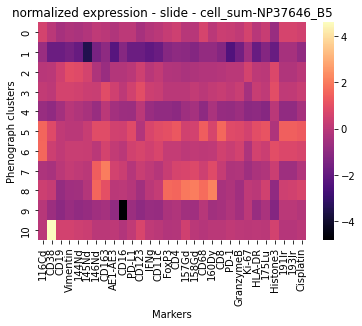

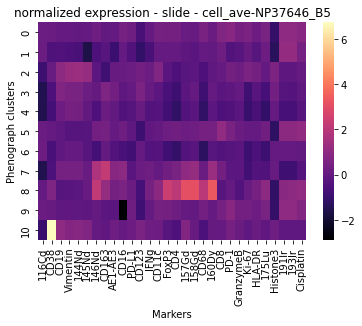

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_subset1-11/cluster_scatter_slide_NP39264_B3.png


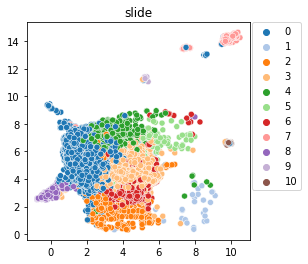

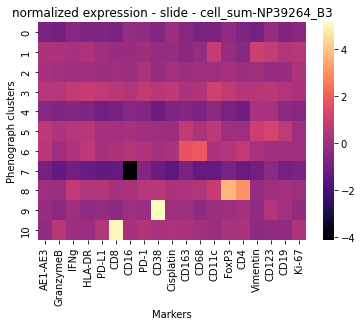

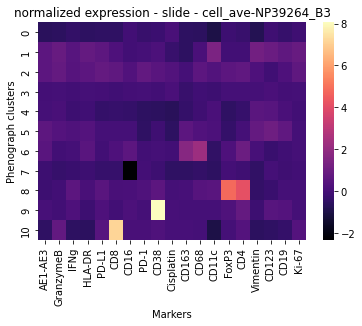

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_all_208_subset1-11/cluster_scatter_slide_NP37646_B5.png


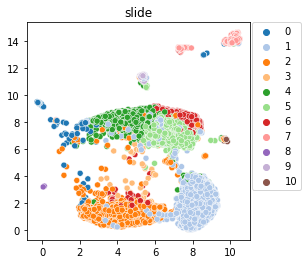

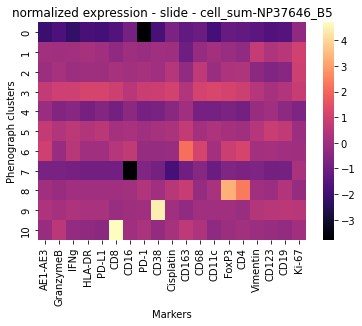

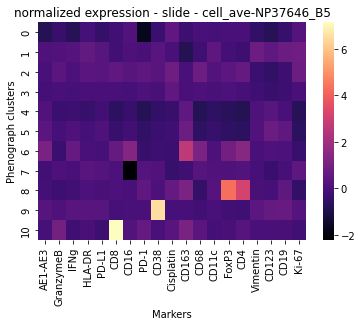

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_all-11/cluster_scatter_slide_NP39264_B3.png


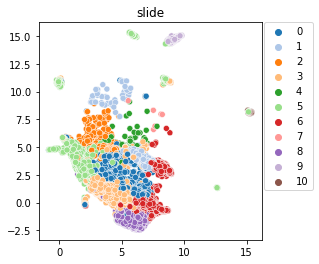

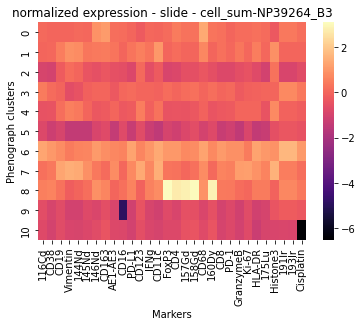

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_all-11/cluster_scatter_slide_NP37646_B5.png


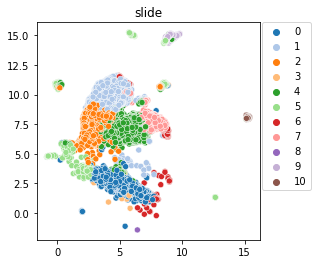

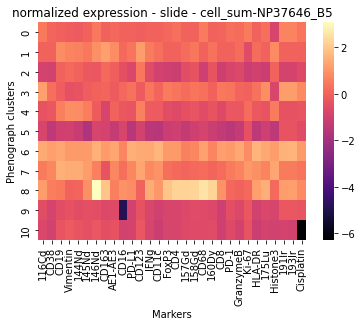

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_subset1-13/cluster_scatter_slide_NP39264_B3.png


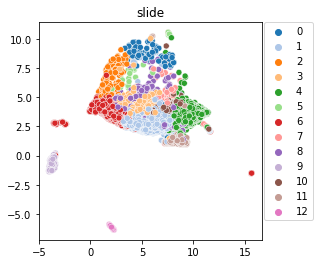

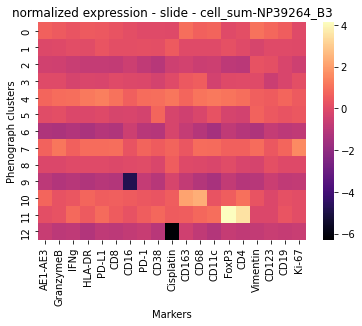

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_208_subset1-13/cluster_scatter_slide_NP37646_B5.png


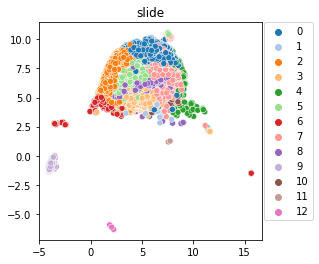

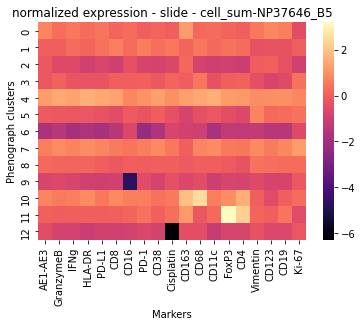

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_all-10/cluster_scatter_slide_NP39264_B3.png


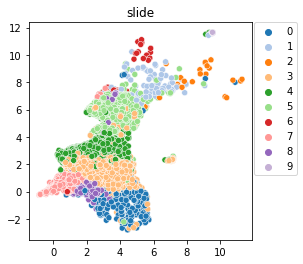

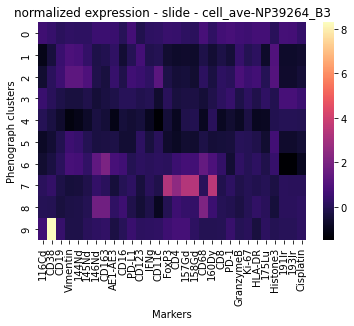

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_all-10/cluster_scatter_slide_NP37646_B5.png


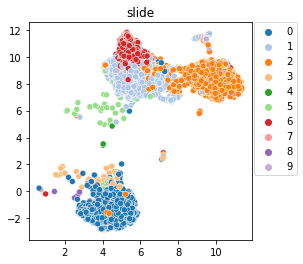

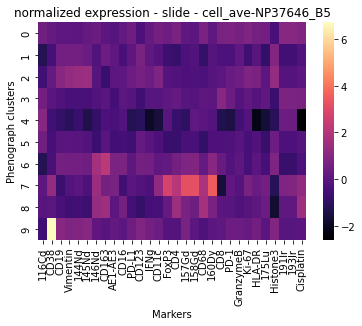

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_subset1-11/cluster_scatter_slide_NP39264_B3.png


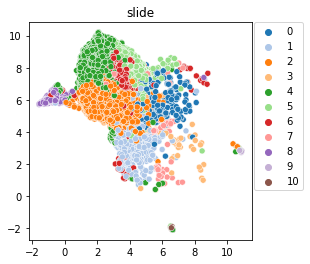

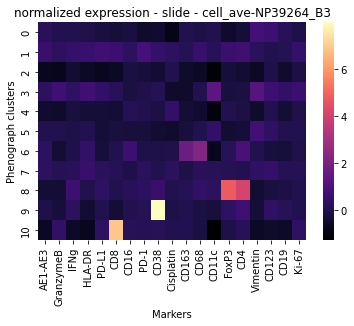

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_208_subset1-11/cluster_scatter_slide_NP37646_B5.png


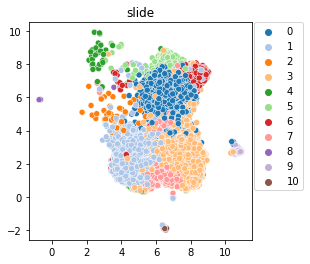

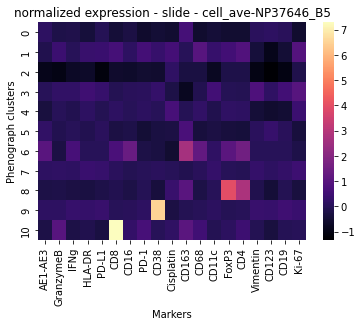

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_all-14/cluster_scatter_slide_NP39264_B3.png


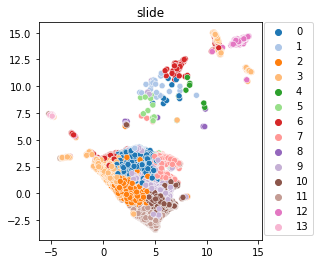

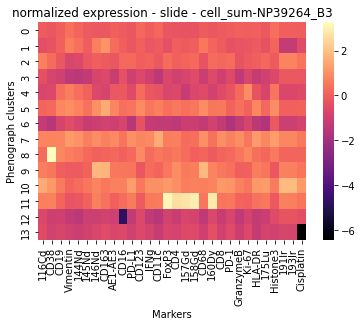

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_all-14/cluster_scatter_slide_NP37646_B5.png


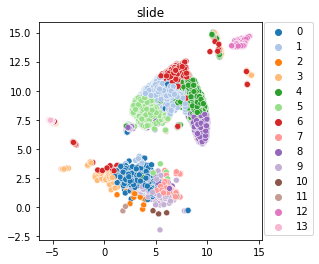

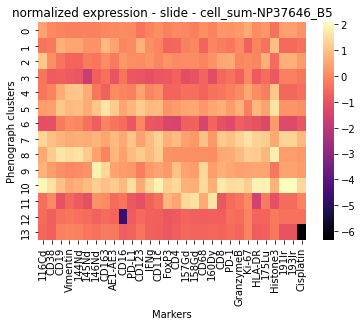

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_subset1-13/cluster_scatter_slide_NP39264_B3.png


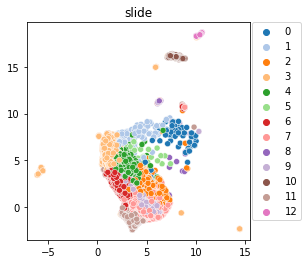

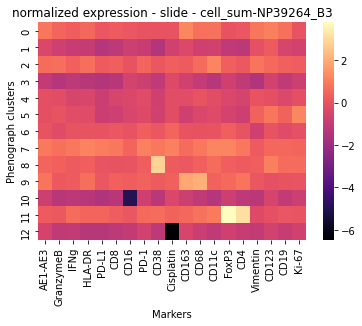

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_sum_only_208_subset1-13/cluster_scatter_slide_NP37646_B5.png


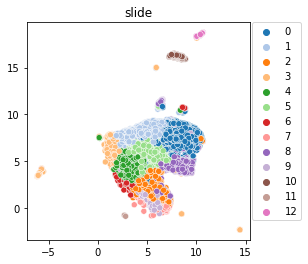

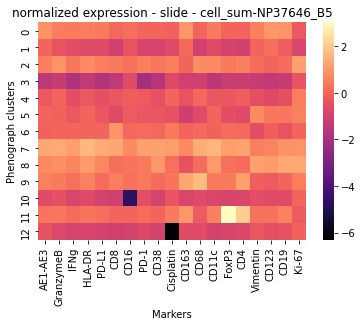

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_all-10/cluster_scatter_slide_NP39264_B3.png


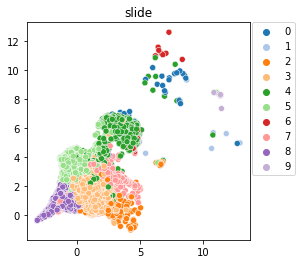

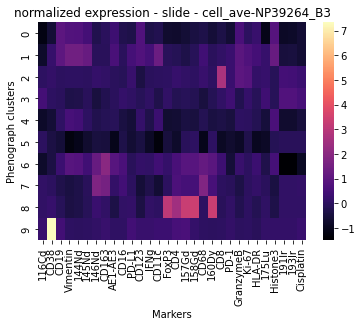

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_all-10/cluster_scatter_slide_NP37646_B5.png


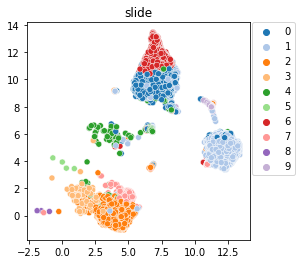

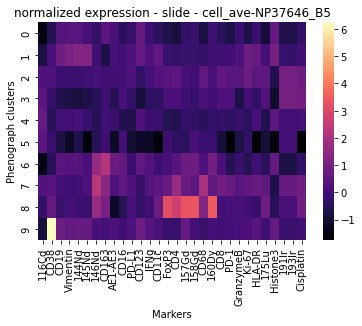

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_slide_NP39264_B3.png


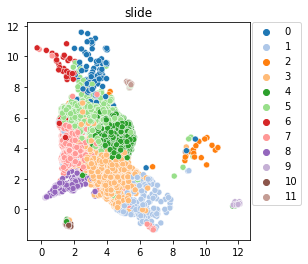

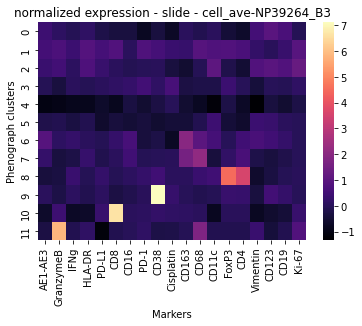

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/75normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_slide_NP37646_B5.png


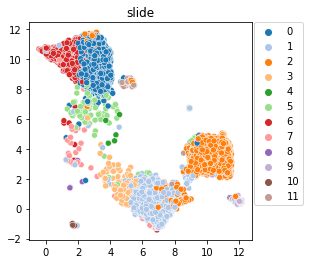

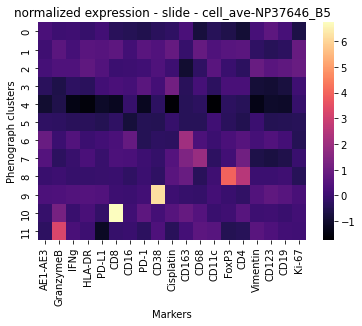

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP39264_B3.png


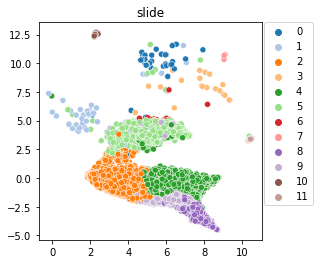

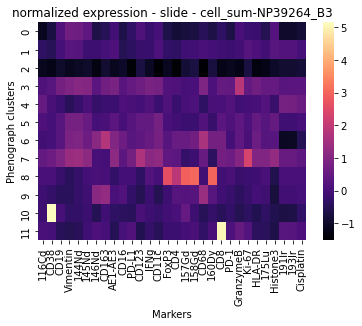

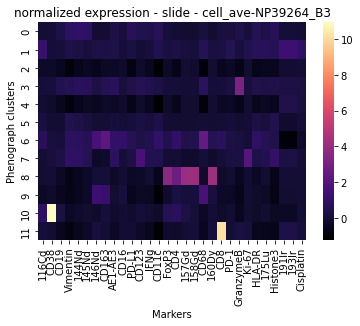

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_all-12/cluster_scatter_slide_NP37646_B5.png


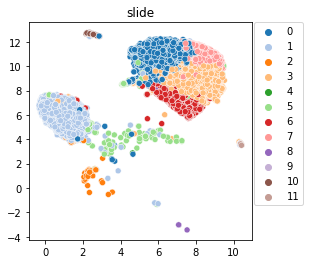

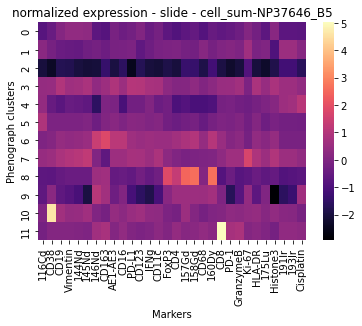

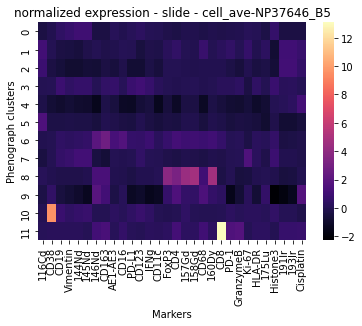

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_subset1-12/cluster_scatter_slide_NP39264_B3.png


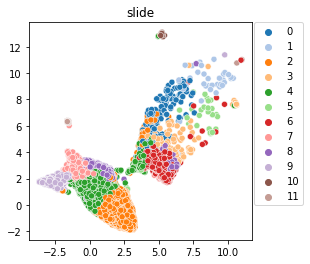

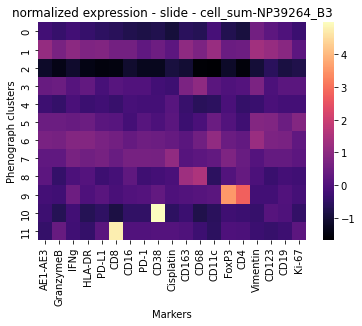

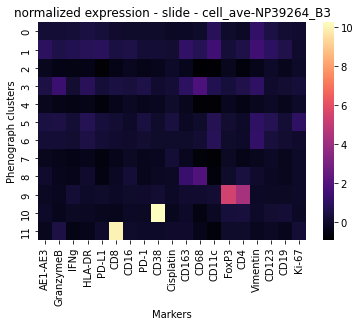

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_all_208_subset1-12/cluster_scatter_slide_NP37646_B5.png


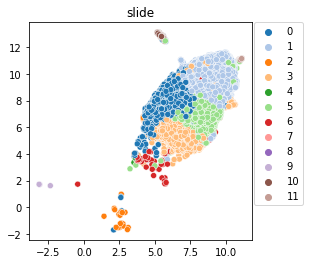

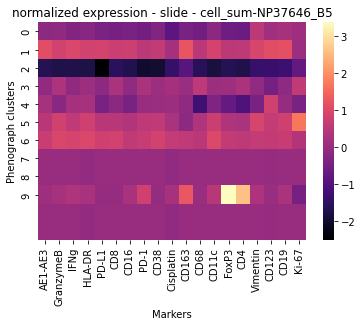

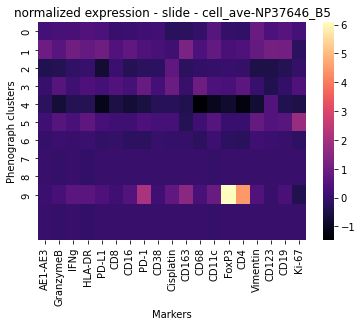

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_all-10/cluster_scatter_slide_NP39264_B3.png


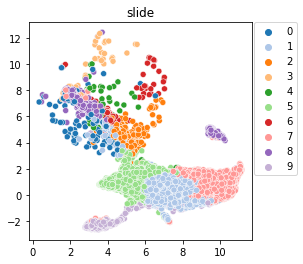

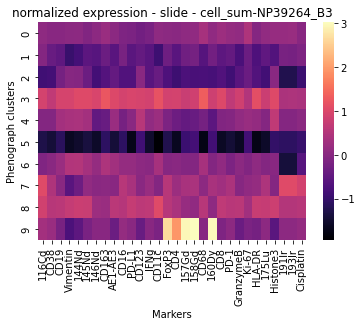

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_all-10/cluster_scatter_slide_NP37646_B5.png


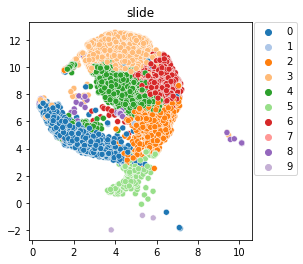

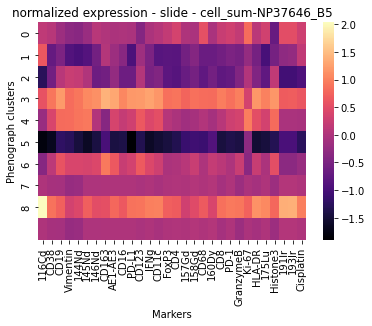

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_subset1-10/cluster_scatter_slide_NP39264_B3.png


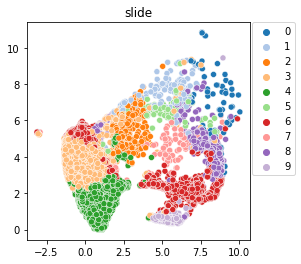

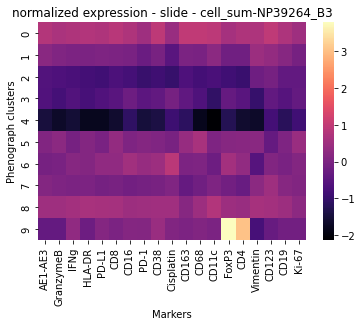

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_208_subset1-10/cluster_scatter_slide_NP37646_B5.png


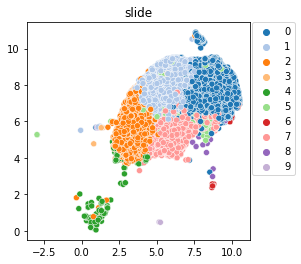

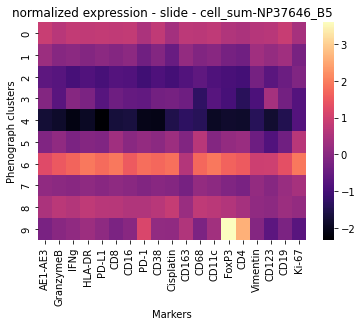

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_all-11/cluster_scatter_slide_NP39264_B3.png


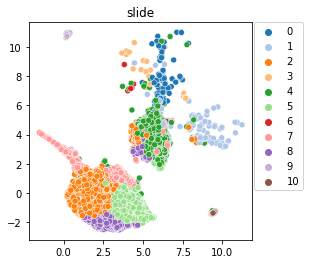

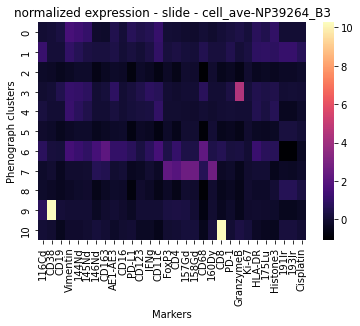

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_all-11/cluster_scatter_slide_NP37646_B5.png


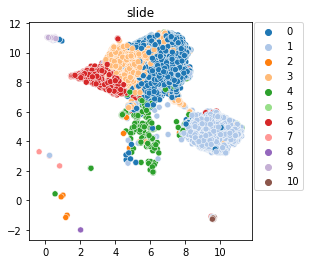

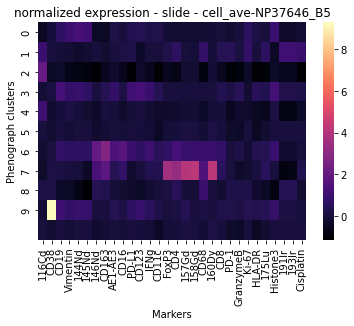

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_subset1-15/cluster_scatter_slide_NP39264_B3.png


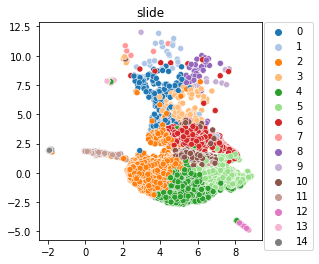

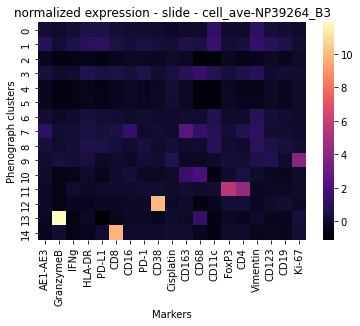

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_208_subset1-15/cluster_scatter_slide_NP37646_B5.png


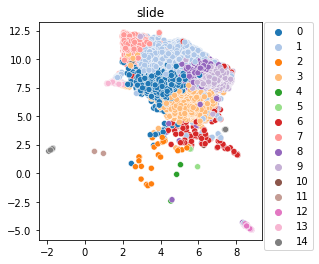

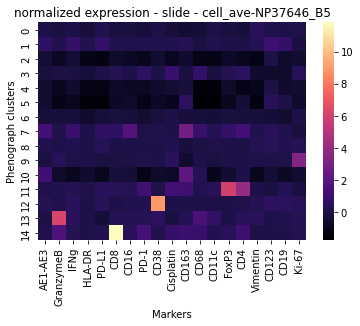

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_all-11/cluster_scatter_slide_NP39264_B3.png


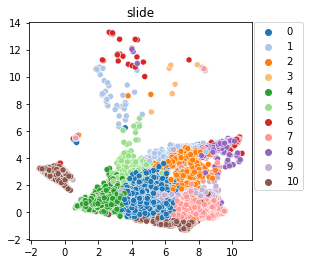

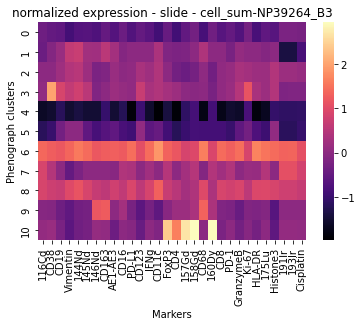

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_all-11/cluster_scatter_slide_NP37646_B5.png


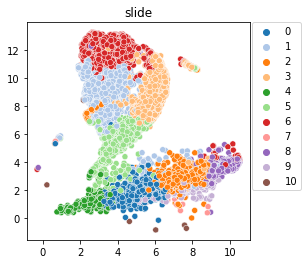

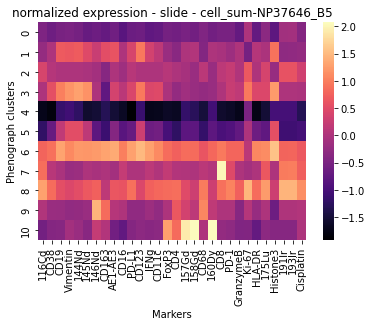

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_subset1-11/cluster_scatter_slide_NP39264_B3.png


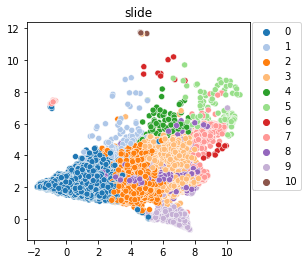

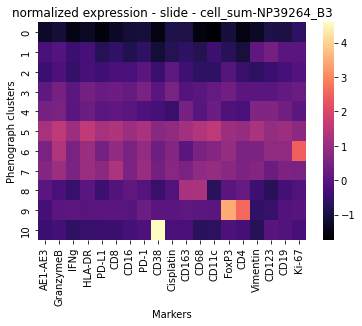

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_sum_only_208_subset1-11/cluster_scatter_slide_NP37646_B5.png


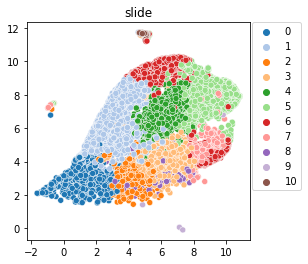

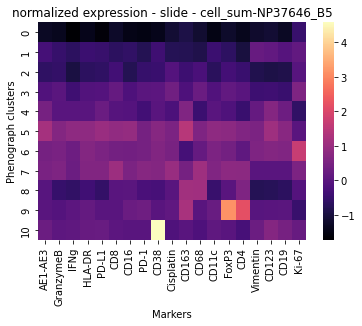

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_all-14/cluster_scatter_slide_NP39264_B3.png


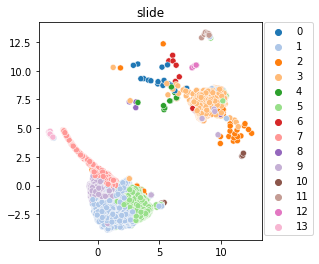

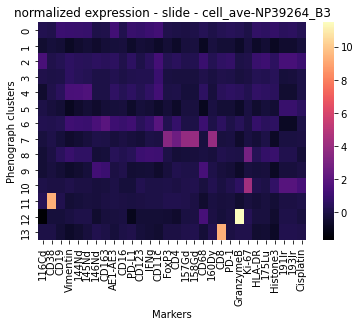

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_all-14/cluster_scatter_slide_NP37646_B5.png


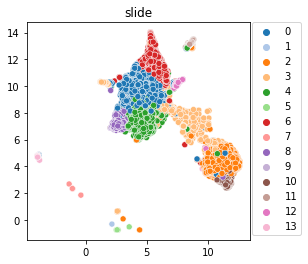

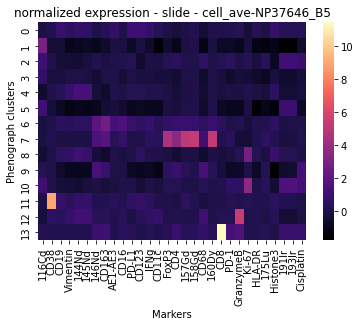

Visualization in 2d - slide-NP39264_B3
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_slide_NP39264_B3.png


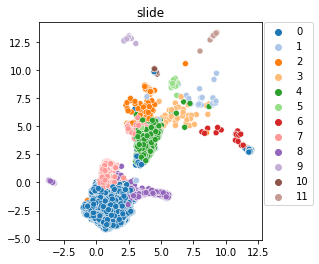

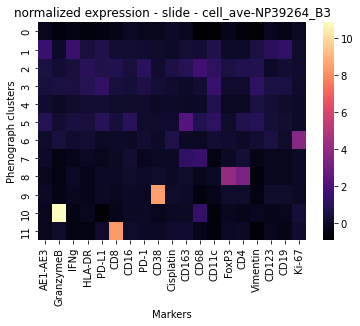

Visualization in 2d - slide-NP37646_B5
saving plot to ../test_out/cohort/test_cohort/test_cohort/phenograph/99normed_scaled_cell_ave_only_208_subset1-12/cluster_scatter_slide_NP37646_B5.png


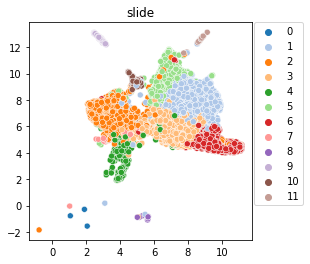

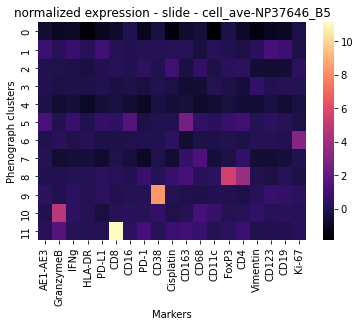

In [28]:
for key_pheno in pheno_keys:
     cytof_cohort.vis_phenograph(key_pheno, level="slide", accumul_type=None, save_vis=True)